In [46]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\anouc\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\anouc\AppData\Local\Temp\ipykernel_3684\1460419796.py", line 22, in <cell line: 22>
    from keras.models import Sequential
  File "c:\Users\anouc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\__init__.py", line 3, in <module>
    from keras import __internal__
  File "c:\Users\anouc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\__internal__\__init__.py", line 6, in <module>
    from keras.__internal__ import models
  File "c:\Users\anouc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\__internal__\models\__init__.py", line 3, in <module>
    from keras.src.models.cloning import clone_and_build_model
  File "c:\Users\anouc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\__in

Number of Duplicates: 0


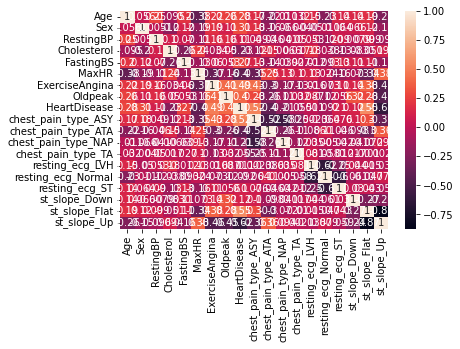

In [58]:
# IMPORTING AND READING IN DATA


# Import csv file
with open('heart.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=' ', quotechar='|')

# Read in data
df = pd.read_csv('heart.csv')



# PREPROCESSING AND DATA CLEANING


# Printing number of duplicates (equal to 0 here)
print("Number of Duplicates:", df.duplicated().sum())

# Male/Female encoding
labelencoder = LabelEncoder()
df['Sex'] = labelencoder.fit_transform(df['Sex'])

# EhestPainType encoding (ATA, NAP, ASY, TA)
df = pd.get_dummies(df, columns=['ChestPainType'], prefix='chest_pain_type')

# RestingECG encoding (Normal, ST, LVH)
df = pd.get_dummies(df, columns=['RestingECG'], prefix='resting_ecg')

# ExerciseAngina encoding (No, Yes)
labelencoder = LabelEncoder()
df['ExerciseAngina'] = labelencoder.fit_transform(df['ExerciseAngina'])

# ST_Slope encoding (Up, Flat, Down)
df = pd.get_dummies(df, columns=['ST_Slope'], prefix='st_slope')

# Correlation matrix heatmap
sns.heatmap(df.corr(), annot=True)

# Dropping RestingBP and RestingEGC because of low correlation with HeartDisease
X = df.drop(['HeartDisease', 'RestingBP', 'resting_ecg_LVH', 'resting_ecg_Normal', 'resting_ecg_ST'], axis=1)
y = df['HeartDisease']

# Splitting training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Results list for future analysis
precision = []
recall = []
accuracy = []

<Axes: >

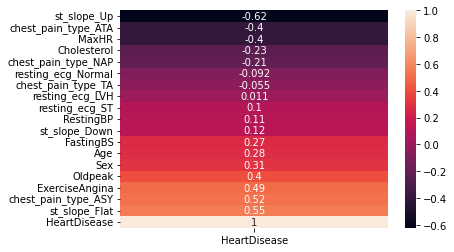

In [60]:
# Correlations relative to HeartDisease
sns.heatmap(df.corr()['HeartDisease'].sort_values().to_frame(), annot=True)

[0.21561265 0.4        0.18060201 0.01010101 0.23287671]
cv_scores mean (default is R2):  0.20783847546801687
[0.42857143 0.38685897 0.45175395 0.49487166 0.43792787]
cv_scores mean (RMSE):  0.43999677678833543
[0.51338933 0.57727273 0.28985507 0.40193603 0.47260274]
cv_scores mean (default is R2):  0.4510111788923582
[0.33755826 0.32471861 0.42056004 0.38465463 0.36311061]
cv_scores mean (RMSE):  0.3661204302299745
[0.62555995 0.54848485 0.45676948 0.43783514 0.49467275]
cv_scores mean (default is R2):  0.5126644341556215
[0.29610727 0.33559325 0.36782953 0.37293143 0.35543187]
cv_scores mean (RMSE):  0.34557866942285453
[0.6205163  0.58579545 0.47080546 0.46896044 0.46232877]
cv_scores mean (default is R2):  0.5216812852760591
[0.29809486 0.32142857 0.36304644 0.36246041 0.36663034]
cv_scores mean (RMSE):  0.34233212595396034
[0.58863241 0.56690909 0.47777035 0.48415264 0.48821918]
cv_scores mean (default is R2):  0.521136732628176
[0.31036516 0.32867493 0.36064945 0.35723808 0.35769

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.60992126 0.61045818 0.53632999 0.54733019 0.5180274 ]
cv_scores mean (default is R2):  0.5644134047098351
[0.30222756 0.31171241 0.33982789 0.33464775 0.34712123]
cv_scores mean (RMSE):  0.32710736722985845
[array([0.42857143, 0.38685897, 0.45175395, 0.49487166, 0.43792787]), array([0.33755826, 0.32471861, 0.42056004, 0.38465463, 0.36311061]), array([0.29610727, 0.33559325, 0.36782953, 0.37293143, 0.35543187]), array([0.29809486, 0.32142857, 0.36304644, 0.36246041, 0.36663034]), array([0.31036516, 0.32867493, 0.36064945, 0.35723808, 0.35769429]), array([0.31074241, 0.33219761, 0.35740731, 0.35395402, 0.34949409]), array([0.31107111, 0.32567916, 0.35835557, 0.34933149, 0.35112344]), array([0.31339159, 0.31777019, 0.34916689, 0.34825244, 0.35491293]), array([0.30200472, 0.31746032, 0.34533691, 0.34203802, 0.35519388]), array([0.30259647, 0.31676511, 0.34493418, 0.34650834, 0.35394063]), array([0.30567798, 0.31294839, 0.34539921, 0.34968603, 0.35441291]), array([0.30257774, 0.31519529,

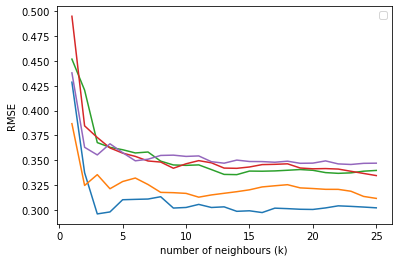

In [15]:
# kNN MODEL

list_RMSE = []

for k in range (1, 26):
  knn_cv = KNeighborsRegressor(n_neighbors=k)
  cv_scores = cross_val_score(knn_cv, X_train_scaled, y_train, cv=5)   # Training model with cv of 5
  
  # Print each cv score (accuracy) and average them
  print(cv_scores)
  print('cv_scores mean (default is R2): ', np.mean(cv_scores))
  neg_mse_scores = cross_val_score(knn_cv, X_train_scaled, y_train, cv=5,
  scoring='neg_mean_squared_error')
  rmse_scores = np.sqrt(-neg_mse_scores)
  
  # Print each cv score (accuracy) and average them
  print(rmse_scores)
  print('cv_scores mean (RMSE): ', np.mean(rmse_scores))
  list_RMSE.append(rmse_scores)

print(list_RMSE)

# Results append
#TODO:fill append
# precision.append()
# recall.append()
# accuracy.append()

# Plot
plt.plot(range(1, 26), list_RMSE)
plt.xlabel('number of neighbours (k)')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [18]:
# RANDOM FOREST MODEL

# Declaring variables
rf = RandomForestClassifier()
n_estimators = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]     # Number of trees in random forest
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]    # Maximum number of levels in tree
min_samples_split = [2, 5, 10]     # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4]    # Minimum number of samples required at each leaf node
bootstrap = [True, False]    # Method of selecting samples for training each tree
max_features = [None, 'sqrt']     # Number of features to consider at every split

# Create the param grid - dictionary
grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}
print(grid)

# Best parameters search for 100 iterations * 3 folds totalling 300 fits
grid_search = RandomizedSearchCV(estimator=rf, n_iter=100, verbose=2, param_distributions=grid, cv=3, n_jobs=-1, random_state=42)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_
print("Meilleurs Paramètres:", best_params)
print("Meilleur Score en Validation Croisée:", best_score)
y_pred = best_model.predict(X_test_scaled)
scores = accuracy_score(y_test, y_pred)
print('Accuracy: ','{:2.2%}'.format(scores))

# Results append
# precision.append()
# recall.append()
accuracy.append(scores)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': [None, 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Meilleurs Paramètres: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
Meilleur Score en Validation Croisée: 0.8759953161592505
Accuracy:  88.59%


In [23]:
# LOGISTIC REGRESSION


# Creating model
poly = PolynomialFeatures(degree=6)
X_poly_python = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)
print(len(X_poly_python)) # Number of features

# Models w/ and w/o penalty
model_no_reg = LogisticRegression(penalty=None, max_iter=10000)
model_reg = LogisticRegression(penalty='l2', C=1, max_iter=10000)
model_no_reg.fit(X_poly_python, y_train)
model_reg.fit(X_poly_python, y_train)

coef_no_reg = model_no_reg.coef_[0]
intercept_no_reg = model_no_reg.intercept_

coef_reg = model_reg.coef_[0]
intercept_reg = model_reg.intercept_

# Predictions
y_train_pred_no_reg = model_no_reg.predict(X_poly_python)
y_pred_no_reg = model_no_reg.predict(X_poly_test)
y_train_pred_reg = model_reg.predict(X_poly_python)
y_pred_reg = model_reg.predict(X_poly_test)

# Results
print("Accuracy train (No Reg):", accuracy_score(y_train, y_train_pred_no_reg))
print("Accuracy test (No Reg):", accuracy_score(y_test, y_pred_no_reg))

print("Accuracy train (Reg):", accuracy_score(y_train, y_train_pred_reg))
print("Accuracy test (Reg):", accuracy_score(y_test, y_pred_reg))

# Results append
# precision.append()
# recall.append()
accuracy.append(accuracy_score(y_test, y_pred_reg))

734


c:\Users\anouc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy train (No Reg): 0.885558583106267
Accuracy test (No Reg): 0.8695652173913043
Accuracy train (Reg): 0.885558583106267
Accuracy test (Reg): 0.8695652173913043


c:\Users\anouc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
# Réseau de neurones

# Building the model
set_random_seed(42)

accuracy_test = []
accuracy_train = []
for i in range(1, 128):
    print(i)
    model = Sequential()
    model.add(Dense(units=i, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))

    model.build(input_shape=X_train_scaled.shape)

    print(model.summary())
    from keras.utils import plot_model
    plot_model(model, to_file='NN-mnist.png', show_shapes=True)

    # Compiling the model
    from keras.optimizers import Adam
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

    from keras.callbacks import EarlyStopping
    early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
    model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.3, callbacks=[early_stopping_monitor])

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
    print(f'Test accuracy: {test_acc}')
    print(f'Test loss: {test_loss}')
    accuracy_test.append(test_acc)

    # Evaluate the model on the train set
    train_loss, train_acc = model.evaluate(X_train_scaled, y_train)
    print(f'Train accuracy: {train_acc}')
    print(f'Train loss: {train_loss}')
    accuracy_train.append(train_acc)
    
# print max accuracy and index
print(max(accuracy_test)) # 0.89
print(accuracy_test.index(max(accuracy_test))) # 73 neurons

# plot accuracy
plt.plot(range(1, 128), accuracy_test)
plt.xlabel('number of neurons')
plt.ylabel('accuracy')
plt.legend()

# print max accuracy and index
print(max(accuracy_train)) # 0.88
print(accuracy_train.index(max(accuracy_train))) # 70 neurons

# plot accuracy
plt.plot(range(1, 128), accuracy_train)
plt.show()

# Results append
# precision.append()
# recall.append()
accuracy.append(max(accuracy_test))

AttributeError: partially initialized module 'keras.src' has no attribute 'utils' (most likely due to a circular import)

Naive Bayes model accuracy: 0.842391304347826


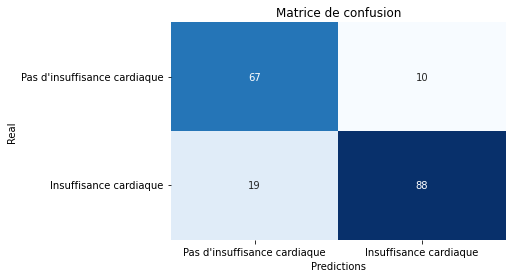

In [24]:
# NAIVE BAYES CLASSIFIER


# Scale for Bayes
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.fit_transform(X_test)

# Model fitting
bayes_model = MultinomialNB(force_alpha=True)
bayes_model.fit(X_train_minmax, y_train)

# Predictions
y_test_proba = bayes_model.predict(X_test_minmax)

# Results
accuracy_test = accuracy_score(y_test, y_test_proba)
print('Naive Bayes model accuracy:', accuracy_test)
conf_matrix = confusion_matrix(y_test, y_test_proba)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Pas d'insuffisance cardiaque", "Insuffisance cardiaque"],
            yticklabels=["Pas d'insuffisance cardiaque", "Insuffisance cardiaque"])

# Plot
plt.title("Matrice de confusion")
plt.xlabel("Predictions")
plt.ylabel("Real")
plt.show()

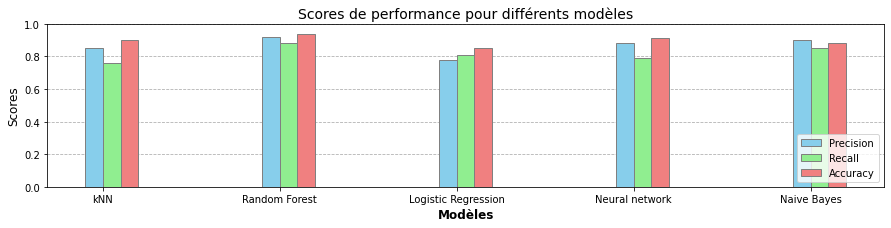

In [44]:
# RESULTS REPORT

bar_width = 0.1

models = ["kNN", "Random Forest", "Logistic Regression", "Neural network", "Naive Bayes"]
precision = [0.85, 0.92, 0.78, 0.88, 0.90]
recall = [0.76, 0.88, 0.81, 0.79, 0.85]
accuracy = [0.90, 0.94, 0.85, 0.91, 0.88]

r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(15, 3))

plt.bar(r1, precision, color='skyblue', width=bar_width, edgecolor='grey', label='Precision', align='edge', zorder=3)
plt.bar(r2, recall, color='lightgreen', width=bar_width, edgecolor='grey', label='Recall', align='edge', zorder=3)
plt.bar(r3, accuracy, color='lightcoral', width=bar_width, edgecolor='grey', label='Accuracy', align='edge', zorder=3)

plt.xlabel('Modèles', fontweight='bold', fontsize=12)
plt.xticks([r + bar_width for r in range(len(models))], models, fontsize=10)
plt.ylim(0, 1)  # Assurez-vous que l'axe y va de 0 à 1 pour les métriques de classification
plt.ylabel('Scores', fontsize=12)
plt.title('Scores de performance pour différents modèles', fontsize=14)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', linewidth = 0.8, zorder=0)

plt.show()